# CNN Clustering Analysis

In [1]:
import sys
sys.path.append('..')

import matplotlib.pylab as plt
import pandas as pd
from tqdm import tqdm
from IPython import display

from src.visualization import draw_mlp_clustering_report, run_double_spectral_cluster
from src.utils import build_clustering_results
from src.experiment_tagging import get_model_path, MODEL_TAG_LOOKUP
from src.spectral_cluster_model import SHUFFLE_METHODS

Using TensorFlow backend.


In [6]:
clustering_results_l1 = {}
clustering_results_l2 = {}

model_tags = ('CNN-MNIST', 'CNN-MNIST+DROPOUT', 'CNN-MNIST+L1REG', 'CNN-MNIST+MOD-INIT',
              'CNN-STACKED-SAME-MNIST', 'CNN-STACKED-MNIST',
              'CNN-FASHION', 'CNN-FASHION+DROPOUT', 'CNN-FASHION+L1REG', 'CNN-FASHION+MOD-INIT',
              'CNN-STACKED-SAME-FASHION', 'CNN-STACKED-FASHION',
              'CNN-CIFAR10', 'CNN-CIFAR10+DROPOUT', 'CNN-CIFAR10+L1REG', 'CNN-CIFAR10+MOD-INIT',
              'CNN-STACKED-SAME-CIFAR10', 'CNN-STACKED-CIFAR10')
model_tags = ('CNN-STACKED-FASHION',)
model_paths = {model_tag: get_model_path(model_tag, filter_='all')[-5:] for model_tag in model_tags}

n_clust = 12
n_samples = 50
n_workers = 10

100%|██████████| 1/1 [01:30<00:00, 90.93s/it]


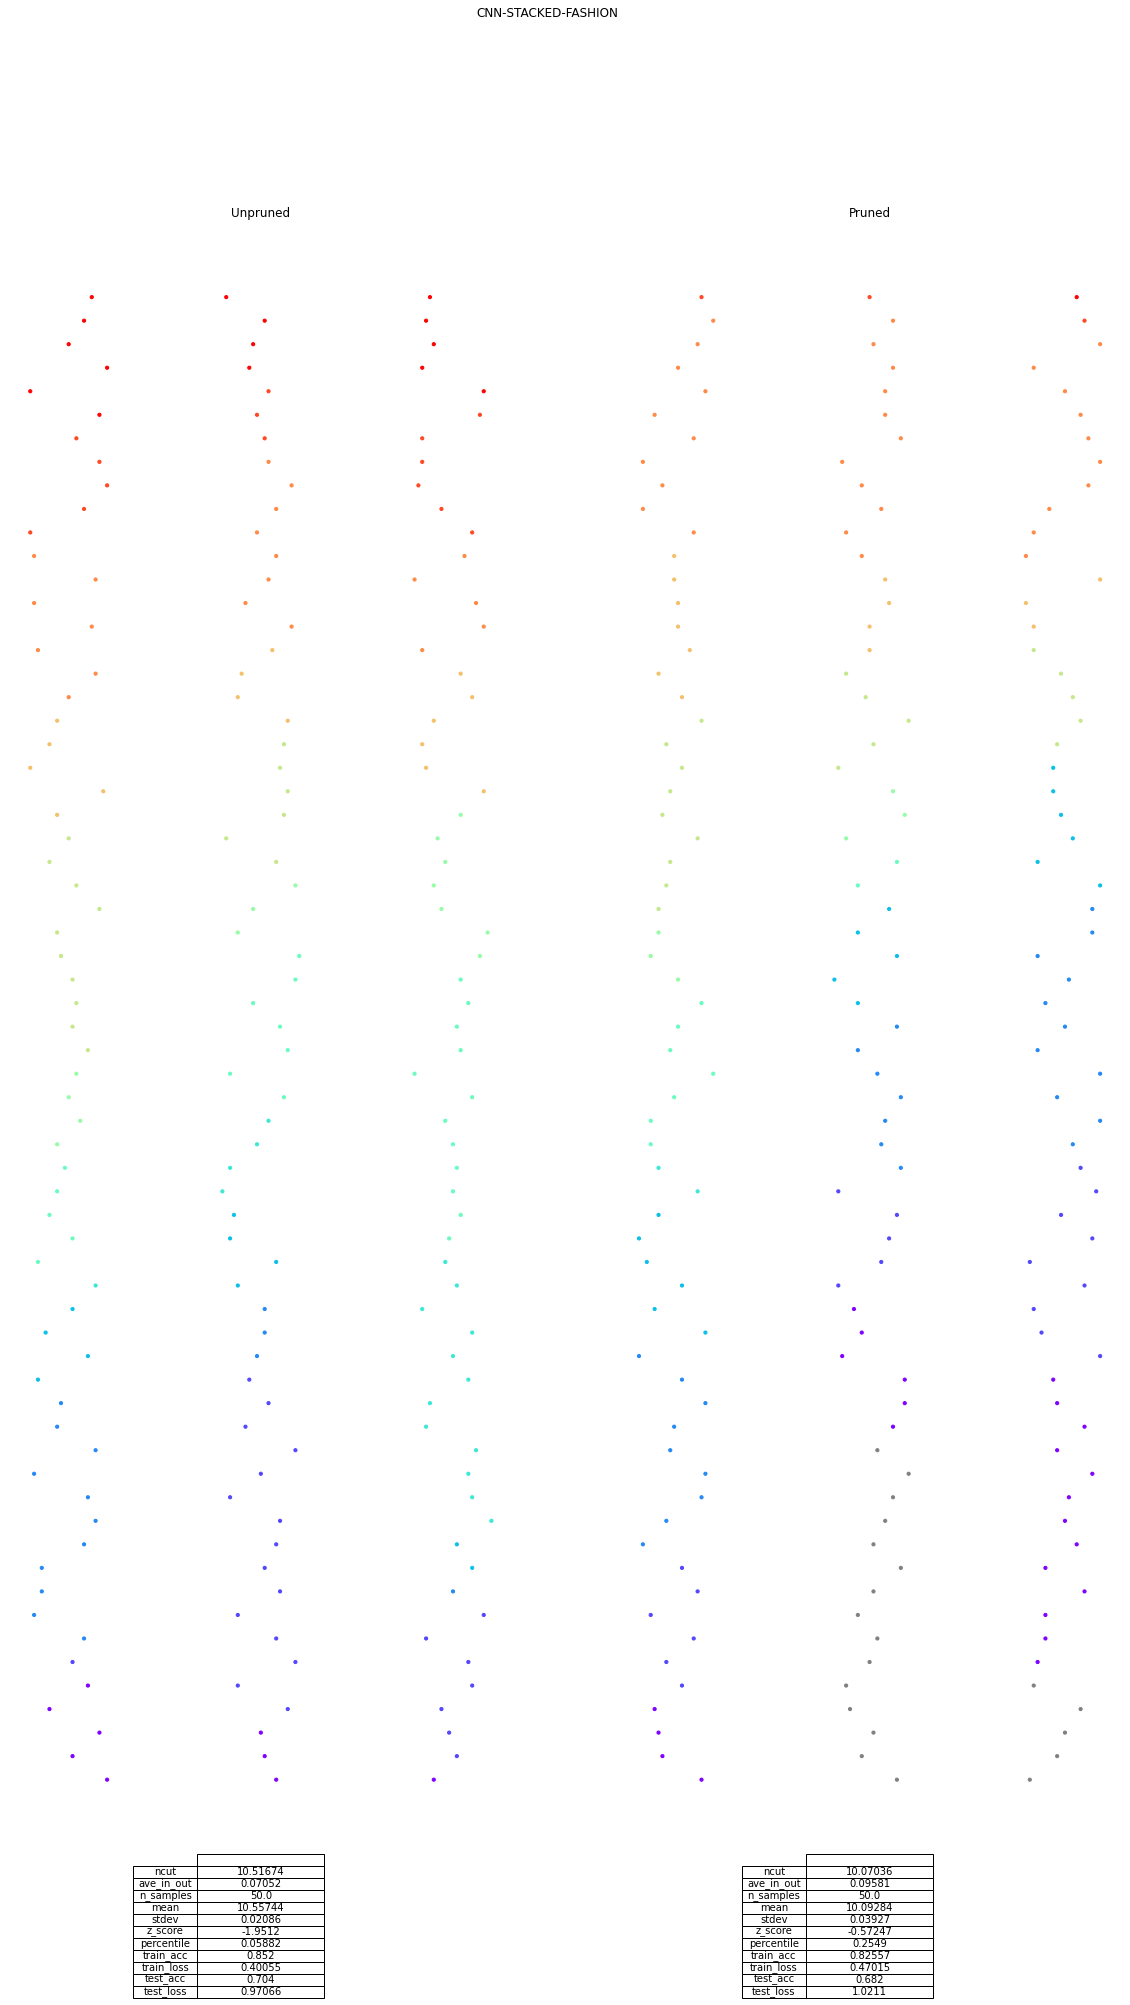

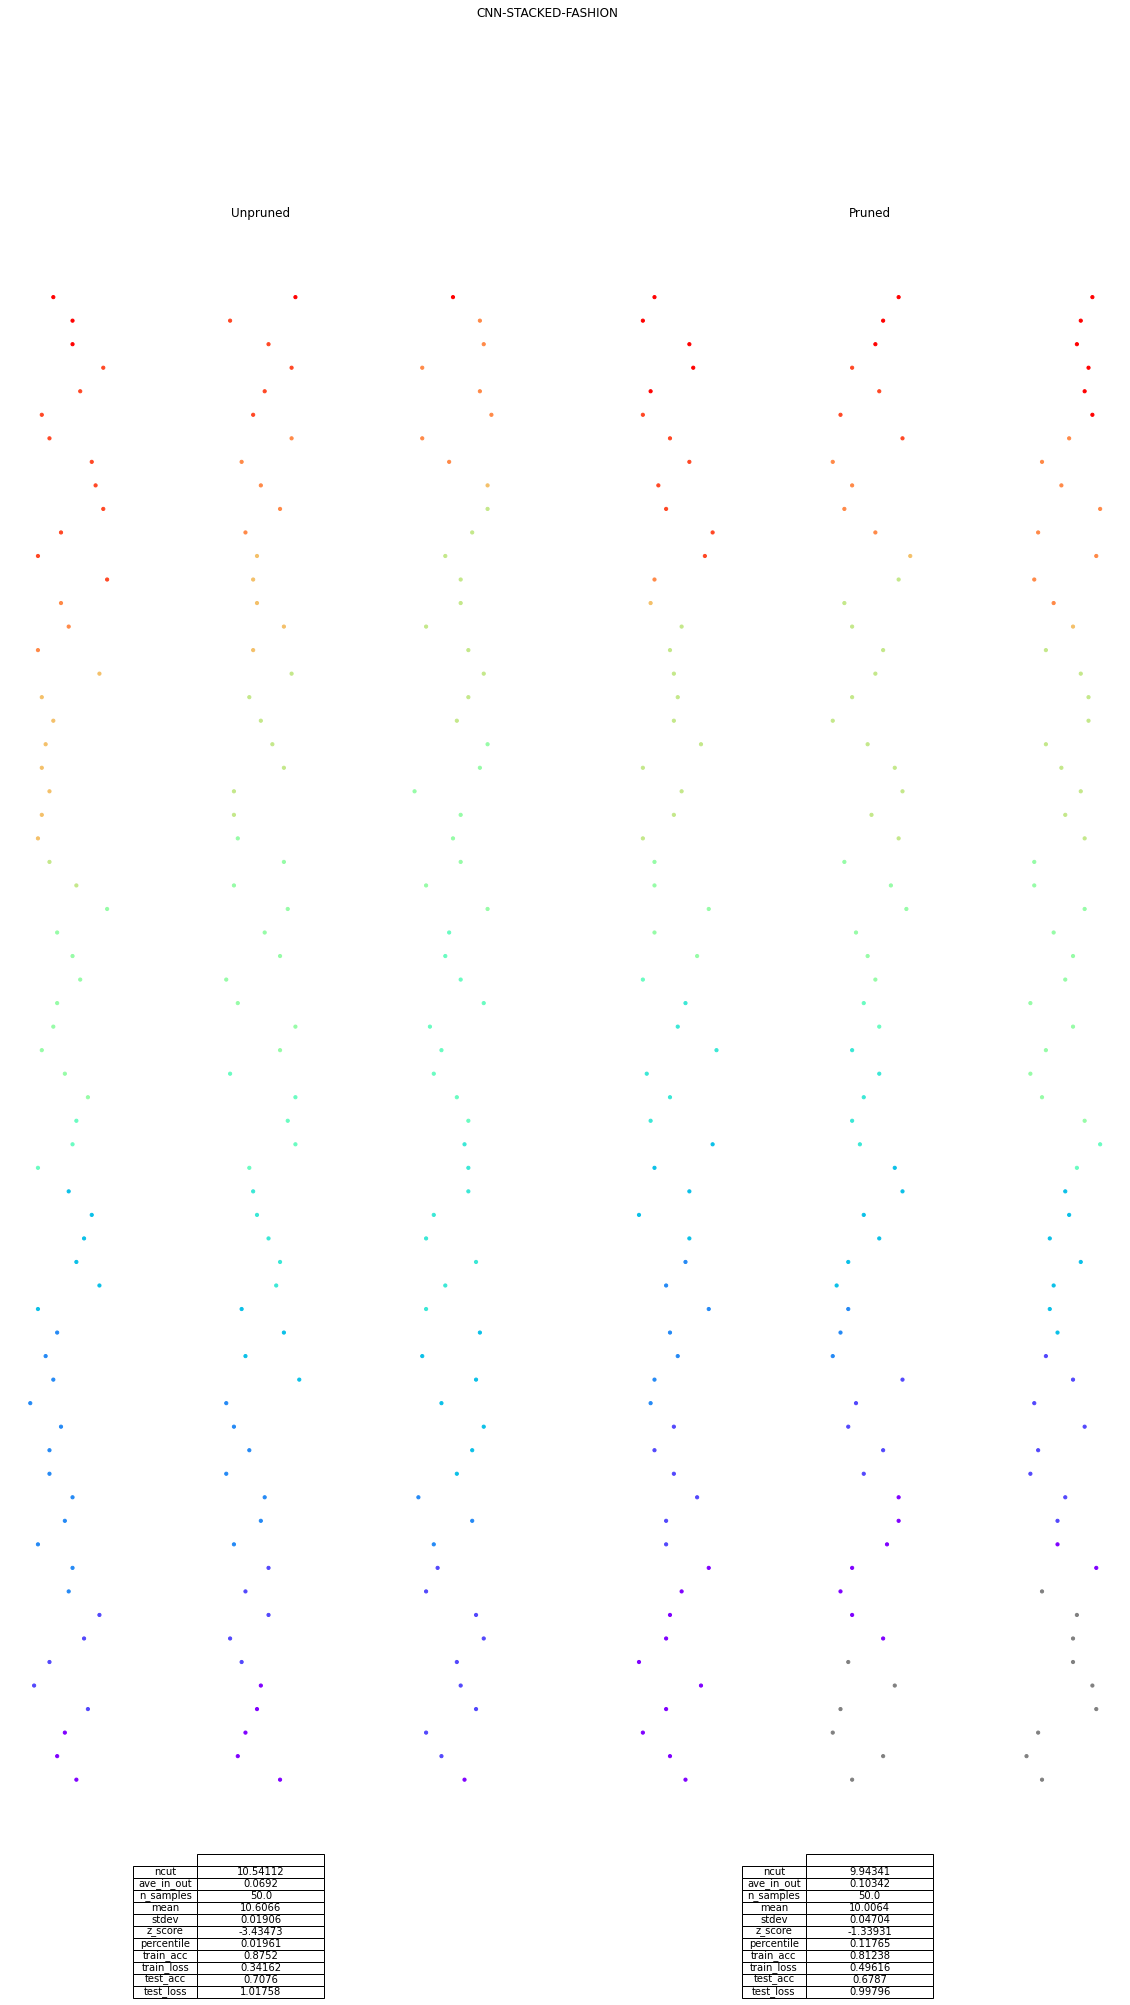

In [ ]:
# L1 filter norm

for model_name, paths in tqdm(model_paths.items()):
    
    for path in paths:
    
        clustering_results_l1[model_name] = run_double_spectral_cluster(path, n_clusters=n_clust,
                                                                        n_samples=n_samples, 
                                                                        n_workers=n_workers,
                                                                        eigen_solver='arpack')
        draw_mlp_clustering_report(path, clustering_results_l1[model_name],
                                   n_cluster=n_clust, title=model_name)
